# 问题情境

文理分科是我国（包括香港和台湾地区）实行的一种教育制度，即将教学课程分为文科和理科让学生做出选择后进行分别教育。即便很多省市取消文理分科，其实也还是有所侧重，尤其是面对高考时仍须做出抉择，要么偏文、要么偏理。对于学生选文还是选理，对于学生乃至家长、老师都是一个相对艰难的抉择。<br>
<img src="figtabs/ch5/arts_and_sciences_division.png" align="center" width=50% height=50% />

LHS => RHS (wlfk=文科, wlfk=理科)

偏文还是偏理，这里边涉及的因素当然很多，比如兴趣爱好等。本实验主要从数据本身出发，找到性别、各科成绩与文理科之间的关系。为学生文理分科的选择提供一些定量依据。  
> 《R语言数据分析》课程通过这一份数据贯穿始终。感兴趣的同学可以对照R和Python的不同实现方式。

# 准备工作

In [1]:
import numpy as np
import pandas as pd

In [2]:
from dppd import *

In [3]:
import pandas_profiling

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine

In [5]:
plt.style.use('seaborn-darkgrid')
sns.set_style('darkgrid')
favorable_figsize = (10, 6)
%matplotlib inline

解决中文显示问题:

In [6]:
plt.rcParams['font.sans-serif'] = ['FangSong']  # 制定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题

In [7]:
import sklearn

忽略掉一些警告，保持界面整洁：

In [8]:
import warnings
warnings.filterwarnings("ignore")

设定随机状态种子，结果可复现：

In [9]:
rng = np.random.RandomState(2012)

# 数据读入

## 读取CSV文件

我们的数据还是存在csv文件中： CSV, the king of tabular file formats  
> The so-called CSV (Comma Separated Values) format is the most common import and export format for spreadsheets and databases. 

In [10]:
scores = pd.read_csv("datasets/scores/scores_en.csv",
                     encoding='utf-8',
                     sep=',',
                     engine='python')

In [11]:
scores.shape

(775, 13)

In [12]:
scores.head()

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk
0,zhou_li,1101,nv,94,82,96,97,97,98,95,94,88,wen_ke
1,shang_hai_meng,1101,NaN,87,94,89,95,94,94,90,90,89,wen_ke
2,shu_jiang_hui,1101,NaN,92,79,86,98,95,96,89,94,87,wen_ke
3,weng_ke,1101,nv,91,84,96,93,97,94,82,90,83,wen_ke
4,qi_jiang,1101,NaN,85,92,82,93,87,88,95,94,93,wen_ke


In [13]:
scores.sample(10)

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk
299,he_dong_mei,1106,nv,93,94,92,92,95,94,86,98,92,wen_ke
530,bing_xiao_yan,1110,nv,87,95,91,89,83,96,93,98,88,li_ke
6,mu_ling_li,1101,nv,88,72,86,94,87,88,89,98,94,wen_ke
358,fan_chi_yu,1107,NaN,89,92,91,95,95,98,92,92,90,wen_ke
135,li/li_hua,1103,nv,94,80,88,98,82,86,69,88,82,wen_ke
220,xiang_ya_ni,1104,nv,90,63,92,89,78,80,57,80,68,wen_ke
500,fu_you_cui,1110,nv,90,97,92,96,97,98,92,100,94,li_ke
289,qu_xin_xiu,1106,nv,94,97,93,99,94,96,80,98,97,wen_ke
403,qi_zhi_shuai,1108,NaN,92,93,95,94,99,96,95,100,95,li_ke
175,hao_sha_sha,1104,nv,86,84,83,95,91,91,94,100,89,wen_ke


## 读取R文件

考虑到有部分小伙伴选修过《R语言数据分析》课程，数据可能另存为rda格式。Python直接读取rda格式也可以：

```
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
pandas2ri.activate()
readRDS = robjects.r['readRDS']
scores_frm_R = readRDS("datasets/scores/scores.rds")
```

```
scores_frm_R
```

```python
import feather
```
将DataFrame/data.frame另存为.feather文件

当然，如果熟悉R的话，以下方式更加加单：

```
%load_ext rpy2.ipython
```

```
%%R -o cjb
load("datasets/scores/cjb.rda")
```

注意-o不能少，否则后续cell中使用不了cjb这一对象。  
一旦读入之后，自然可以使用cjb

```
cjb
```

当然也可以尝试其他一些R代码：

```
%%R
library(ggplot2)
ggplot(iris, aes(x=Petal.Length,
                 y=Petal.Width,
                 colour=Species,
                 shape=Species)) +
    geom_point()
```

## 读取Excel文件

In [14]:
scores = pd.read_excel("datasets/scores/scores_en.xlsx")
scores.shape

(775, 13)

In [15]:
scores.info

<bound method DataFrame.info of                   xm    bj   xb  yw  sx  wy  zz   ls  dl  wl  hx  sw    wlfk
0            zhou_li  1101   nv  94  82  96  97   97  98  95  94  88  wen_ke
1     shang_hai_meng  1101  NaN  87  94  89  95   94  94  90  90  89  wen_ke
2      shu_jiang_hui  1101  NaN  92  79  86  98   95  96  89  94  87  wen_ke
3            weng_ke  1101   nv  91  84  96  93   97  94  82  90  83  wen_ke
4           qi_jiang  1101  NaN  85  92  82  93   87  88  95  94  93  wen_ke
..               ...   ...  ...  ..  ..  ..  ..  ...  ..  ..  ..  ..     ...
770      tan_guan_fa  1115  NaN  79  78  70  83   86  86  76  78  70   li_ke
771  ying_shang_qing  1115  NaN  87  63  55  93  100  94  43  88  82   li_ke
772     xu_hong_beng  1115  NaN  85  59  89  80   85  82  61  64  75   li_ke
773  chang_xiao_feng  1115  NaN  81  62  76  89   76  91  49  68  74   li_ke
774     zheng_mu_hai  1115  NaN  72  59  82  92   85  82  59  58  55   li_ke

[775 rows x 13 columns]>

读入数据，并进行查看：

In [16]:
scores.columns

Index(['xm', 'bj', 'xb', 'yw', 'sx', 'wy', 'zz', 'ls', 'dl', 'wl', 'hx', 'sw',
       'wlfk'],
      dtype='object')

这份数据包含775行、13列，各列具体含义如下：  
* xm:姓名
* bj:班级
* xb:性别
* yw:语文
* sx:数学
* wy:外语
* zz:政治
* ls:历史
* dl:地理
* hx:化学
* sw:生物
* wlfk:文理分科

当然，更直观的方式，是直接查看部分数据：

In [17]:
scores.head()

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk
0,zhou_li,1101,nv,94,82,96,97,97,98,95,94,88,wen_ke
1,shang_hai_meng,1101,NaN,87,94,89,95,94,94,90,90,89,wen_ke
2,shu_jiang_hui,1101,NaN,92,79,86,98,95,96,89,94,87,wen_ke
3,weng_ke,1101,nv,91,84,96,93,97,94,82,90,83,wen_ke
4,qi_jiang,1101,NaN,85,92,82,93,87,88,95,94,93,wen_ke


# 数据预处理

可能有小伙伴已经发现了，其中有NaN字样，显然并不是表示缺失，而是原来的数据中，表示性别为男nan。这个时候，我们就需要重新读取数据了（这种反复在数据挖掘的实践中再平常不过了）：

In [18]:
scores = pd.read_excel("datasets/scores/scores_en.xlsx",
                      keep_default_na = False)
scores.tail(n = 10)

,xm,bj,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk
765,sun_rong_hua,1115,nan,81,79,79,87,92,86,72,84,79,li_ke
766,ju_xiu_lin,1115,nan,78,62,79,94,93,90,83,86,74,li_ke
767,liu_li_bin,1115,nan,88,73,84,87,81,84,81,88,73,li_ke
768,liu_ji,1115,nv,91,85,88,89,61,92,71,82,79,li_ke
769,ji_bing,1115,nan,88,68,77,91,82,87,62,88,67,li_ke
770,tan_guan_fa,1115,nan,79,78,70,83,86,86,76,78,70,li_ke
771,ying_shang_qing,1115,nan,87,63,55,93,100,94,43,88,82,li_ke
772,xu_hong_beng,1115,nan,85,59,89,80,85,82,61,64,75,li_ke
773,chang_xiao_feng,1115,nan,81,62,76,89,76,91,49,68,74,li_ke
774,zheng_mu_hai,1115,nan,72,59,82,92,85,82,59,58,55,li_ke


此时看不出数据有什么明显不对的地方。我们再看看数据的类型：

In [19]:
scores.dtypes

xm      object
bj       int64
xb      object
yw       int64
sx       int64
wy       int64
zz       int64
ls       int64
dl       int64
wl       int64
hx       int64
sw       int64
wlfk    object
dtype: object

显然，班级并不应该作为整型数据来对待：

In [20]:
scores.bj = scores.bj.astype('str')
scores.bj = scores.bj.astype(str)

In [21]:
scores.dtypes

xm      object
bj      object
xb      object
yw       int64
sx       int64
wy       int64
zz       int64
ls       int64
dl       int64
wl       int64
hx       int64
sw       int64
wlfk    object
dtype: object

注意，在DataFrame里边：  
> Pandas uses the object dtype for storing strings.

In [22]:
from sklearn.datasets import load_iris

In [23]:
iris = load_iris()

In [24]:
X, y = load_iris(return_X_y=True)

In [25]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [26]:
y[:5]

array([0, 0, 0, 0, 0])

为了方便建模，我们将数据统一为X和y。其中X表示文理分科可能考虑的因素，y表示最后文理分科的结果。显然，姓名、班级并非我们考虑的因素，直接剔除即可。

In [27]:
X = scores.drop(['xm', 'bj', 'wlfk'], axis=1)
y = scores.wlfk

In [28]:
subjects = ['yw', 'sx', 'wy', 'zz', 'ls', 'dl', 'wl', 'hx', 'sw']

实际上，对于后续分析而言，姓名也不应该作为特征——不应该根据某个人名字的不同，来对其进行判断：

In [29]:
scores = scores.drop('xm', axis=1)

## 类标的编码

对于分类问题而言，因变量都是类别变量，他们可能是字符、数字或是其他类型。如果使用sklearn进行模型训练的话，需要将他们先转换成数值。这个转换，或者说映射的过程，当然可以手工完成。比如：

In [30]:
mapping1 = {'li_ke': 0, 'wen_ke': 1}
y_numeric1 = y.map(mapping1)
idx = list(range(385, 396, 1))
y_numeric1[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
Name: wlfk, dtype: int64

In [31]:
list(mapping1.items())

[('li_ke', 0), ('wen_ke', 1)]

In [32]:
inv_mapping1 = {v: k for k, v in mapping1.items()}

In [33]:
y_numeric1.map(inv_mapping1)[idx]

385    wen_ke
386    wen_ke
387    wen_ke
388    wen_ke
389    wen_ke
390    wen_ke
391     li_ke
392     li_ke
393     li_ke
394     li_ke
395     li_ke
Name: wlfk, dtype: object

或者：

In [34]:
mapping2 = {label: idx for idx, label in enumerate(np.unique(y))}
mapping2

{'li_ke': 0, 'wen_ke': 1}

In [35]:
y_numeric2 = y.map(mapping2)[idx]
y_numeric2[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
Name: wlfk, dtype: int64

再或者：

In [36]:
y_numeric3 = np.where(y == 'li_ke', 0, 1)
y_numeric3[idx]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

又或者：

In [37]:
y_numeric4 = (y == 'wen_ke').astype(np.int)
y_numeric4[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
Name: wlfk, dtype: int32

还或者：

In [38]:
y_numeric5 = y.astype('category').cat.codes
y_numeric5[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
dtype: int8

…或者

In [39]:
y_numeric6 = y.map(lambda v: 1 if v == 'wen_ke' else 0)
y_numeric6[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
Name: wlfk, dtype: int64

…或者：

In [40]:
y_numeric7 = y.apply(lambda v: 1 if v == 'wen_ke' else 0)
y_numeric7[idx]

385    1
386    1
387    1
388    1
389    1
390    1
391    0
392    0
393    0
394    0
395    0
Name: wlfk, dtype: int64

当然，如果不想重复造轮子的话，当然可以直接调用sklearn.preprocessing中的LabelEncoder:

In [41]:
from sklearn.preprocessing import LabelEncoder
class_encoding = LabelEncoder()
y_numeric = class_encoding.fit_transform(y)
y_numeric[idx]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [42]:
class_encoding.inverse_transform(y_numeric)[idx]

array(['wen_ke', 'wen_ke', 'wen_ke', 'wen_ke', 'wen_ke', 'wen_ke',
       'li_ke', 'li_ke', 'li_ke', 'li_ke', 'li_ke'], dtype=object)

## 哑元变量与独热码

在后续建模过程中，很多模型要求变量必须为数值类型，我们需要将类别变量转换为数值变量。一个最基本的方法，就是为每个类别找一个对应的数，比如对省份这个类别变量，令北京=1、上海=2、天津=3、……。这样直接交给算法的话，数据格式上没有问题，自然也就能生成一个模型。但问题在于，上海是北京的2倍、天津市北京的3倍么？这种量化关系是不存在的。为了解决类别变量数值化的问题，一般采用独热码one-hot encoding或是哑元变量dummy variables的方法。

独热码One-hot encoding和dummy都可以对Categorical Variable做处理，转换为定量特征，转换为定量特征其实就是将原来每个特征的类别拿出来作为一个新的特征了。文理分科中的性别这一特征，取值为男、女，采用独热码的话，将xb_nan作为一个特征，xb_nv作为一个特征，二者取值要么为0、要么为1。即便类别再多，只能有一者为1，one-hot么；采用哑元变量的话，则只看xb_nan是否为1即可。可以看得出来，二者思路完全一致，区别在于：若Categorical Variable具有n个水平，Dummy Encoding 会将这个Categorical Variable转换为n-1个特征变量，而OneHot Encoding会转换为n个特征变量。

In [43]:
def to_be_numeric(X, nonnumeric_cols):
    for nnc in nonnumeric_cols:
        dummies = pd.get_dummies(X.loc[:, nnc], prefix = nnc)
        X = pd.concat([X, dummies], axis = 1)
    X = X.drop(nonnumeric_cols, axis = 1)
    return X

注意，pandas里边的get_dummies()函数，有一个参数'drop_first=False'，也就是说，默认情况下，其实和独热码结果一致。  

除了pandas.get_dummies之外，sklearn.preprocessing也有OneHotEncoder，效果相同，在此不再赘述，请同学们自行练习。

In [44]:
X_numeric = to_be_numeric(X, ['xb'])

In [45]:
import pickle
objects_to_be_saved = {'X_numeric': y_numeric,
                       'y_numeric':y_numeric}
with open('pickle/ch5_data.pkl', 'wb') as f:
    pickle.dump(objects_to_be_saved, f)

In [46]:
import pickle
with open('pickle/ch5_data.pkl', 'rb') as f:
    objects_awaken = pickle.load(f)
objects_awaken.keys()

dict_keys(['X_numeric', 'y_numeric'])

In [47]:
X_numeric = objects_awaken['X_numeric']
y_numeric = objects_awaken['y_numeric']

# 探索性数据分析

在对数据进行深入探索之前，一般要看看数据的高矮胖瘦，未知其内，先表其外。接下来，我们通过若干典型的统计图形，对数据的形态进行刻画，开展探索性数据分析。

## 数据摘要

In [48]:
scores_profile = pandas_profiling.ProfileReport(scores)

In [49]:
scores_profile.to_file(r"D:\desktop\scores_profile.html")

可直接点击查看生成的[scores_profile](./scores_profile.html)

## 分布形态

说到数据的形态，分布当然是最为重要的了。有一种说法：  
> Statistics is essentially the study of distributions。  

姑且不论这种说法是否夸张，从侧面也证明分布的重要性。我们先来看一下观察一下数学成绩的分布：

先通过柱状图，看看每个班级学生的人数。

容易看出，男女生比例基本平衡，女生略多于男生。

In [50]:
from plotnine import *

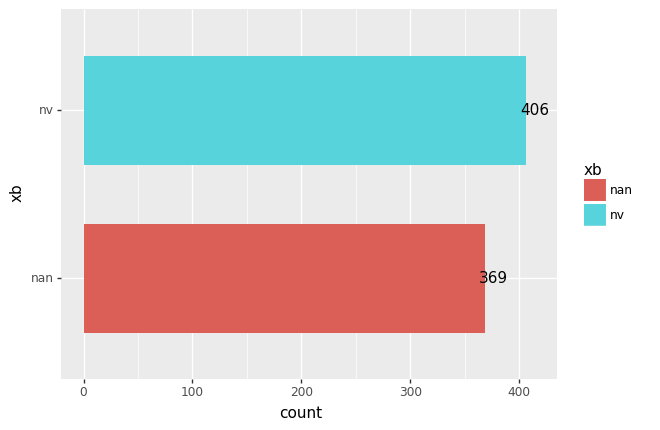

<ggplot: (-9223371920845453384)>

In [51]:
(
    ggplot(scores)
    +geom_bar(aes(x='xb', fill='xb'), width=0.65)
    +geom_text(aes(x='xb', y='stat(count)*1.02', label='stat(count)'), stat='count')
    +coord_flip()
)

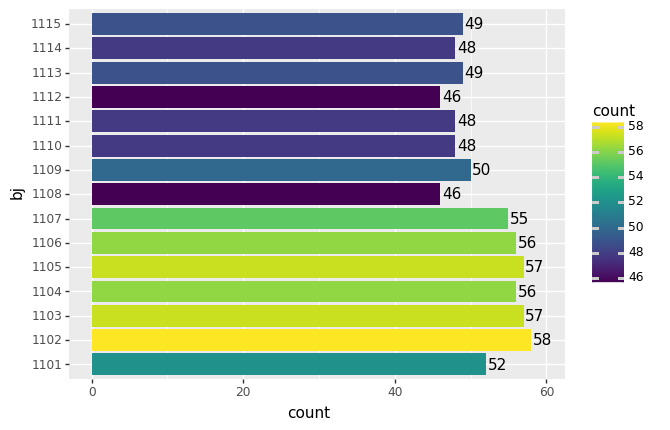

<ggplot: (-9223371920844381356)>

In [52]:
(ggplot(scores)
+aes(x='bj')
+geom_bar(aes(fill='stat(count)'))
+geom_text(aes(x='bj', y='stat(count)+1.5', label='stat(count)'), 
           stat='count')
+coord_flip())

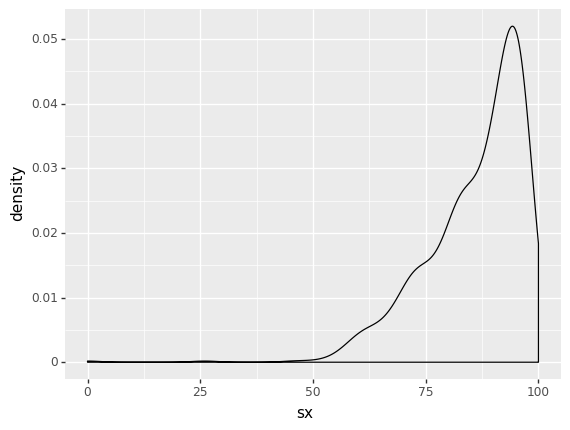

<ggplot: (-9223371920844282756)>

In [53]:
(
    ggplot(scores)
    +aes(x='sx')
    +geom_density()
)

In [54]:
col_means = scores[subjects].mean()
col_stds = scores[subjects].std()

In [55]:
score_mean_std = pd.DataFrame({'subject': subjects,
                              'mean':col_means,
                              'std': col_stds})

In [56]:
score_mean_std

,subject,mean,std
yw,yw,87.265806,5.853646
sx,sx,86.081290,10.894839
wy,wy,87.397419,7.670508
zz,zz,92.210323,5.637948
ls,ls,89.027097,8.297943
dl,dl,92.914839,5.904973
wl,wl,81.095484,12.455862
hx,hx,91.566452,8.277981
sw,sw,86.264516,8.823036


从上图能看出，几乎每门课成绩里边，都有异常情况，存在分数极低的同学。

In [57]:
scores[subjects].min()

yw    0
sx    0
wy    0
zz    0
ls    0
dl    0
wl    0
hx    0
sw    0
dtype: int64

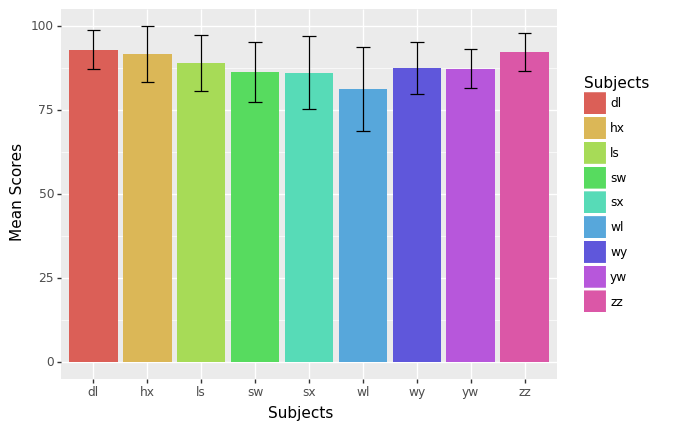

<ggplot: (-9223371920844296720)>

In [58]:
(
    ggplot(score_mean_std)
    +geom_bar(aes(x='subject', y='mean', fill='subject'), stat='identity')
    +geom_errorbar(aes(x='subject', ymin='mean-std', ymax='mean+std'), width=0.25)
    +labs(x='Subjects', y='Mean Scores', fill='Subjects')
)

In [59]:
score_mean_std.info

<bound method DataFrame.info of    subject       mean        std
yw      yw  87.265806   5.853646
sx      sx  86.081290  10.894839
wy      wy  87.397419   7.670508
zz      zz  92.210323   5.637948
ls      ls  89.027097   8.297943
dl      dl  92.914839   5.904973
wl      wl  81.095484  12.455862
hx      hx  91.566452   8.277981
sw      sw  86.264516   8.823036>

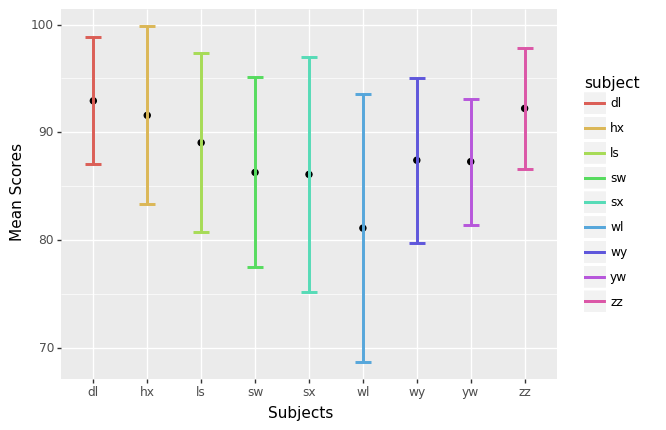

<ggplot: (-9223371920840937736)>

In [60]:
(
    ggplot(score_mean_std)
    +aes(x='factor(subject)', y='mean')
    #+geom_path(colour='black')
    +geom_point(size=2)
    +geom_errorbar(aes(x='subject', ymin='mean-std', ymax='mean+std', colour='subject'), width=0.3, size=1.2)
    +labs(x='Subjects', y='Mean Scores', fill='Subjects')
)

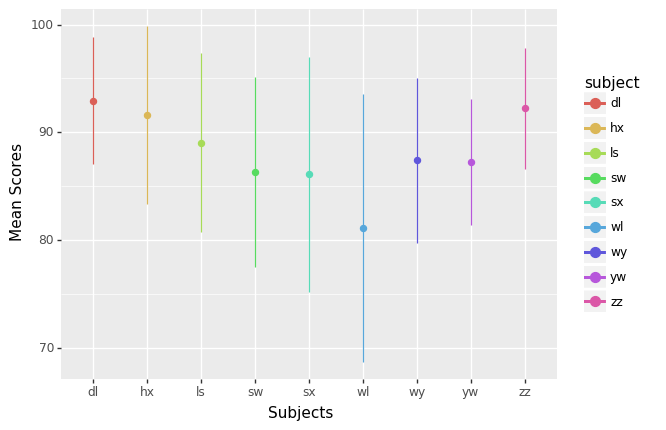

<ggplot: (-9223371920844148872)>


In [61]:
base_plot = (
    ggplot(score_mean_std)
    +aes(x='factor(subject)', y='mean')
    +geom_pointrange(aes(x='subject', ymin='mean-std', ymax='mean+std', colour='subject'))
    +labs(x='Subjects', y='Mean Scores', fill='Subjects')
)
print(base_plot)

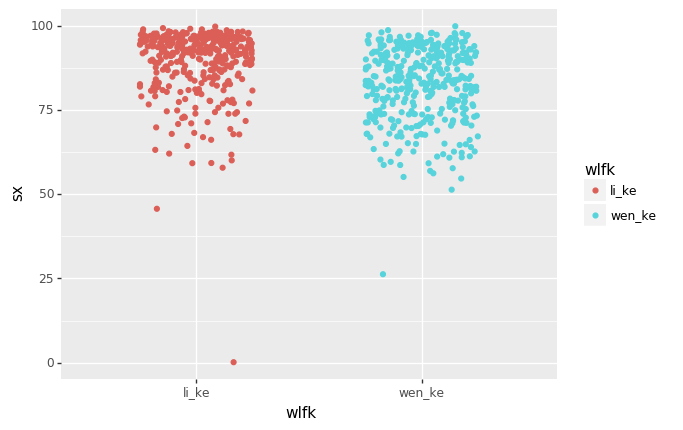

<ggplot: (-9223371920844148800)>

In [62]:
(
    ggplot(scores)
    +geom_jitter(aes(x='wlfk', y='sx', colour='wlfk'), width=0.25)
)

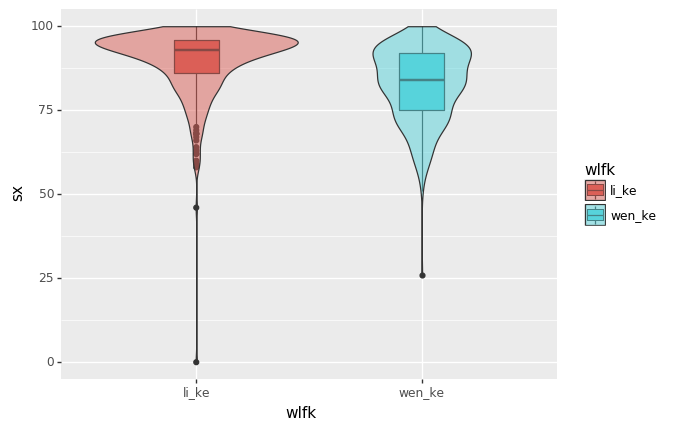

<ggplot: (-9223371920843716980)>

In [63]:
(
    ggplot(scores)
    +aes(x='wlfk', y='sx', fill='wlfk')
    +geom_boxplot(width=0.2)
    +geom_violin(alpha=0.5)
)

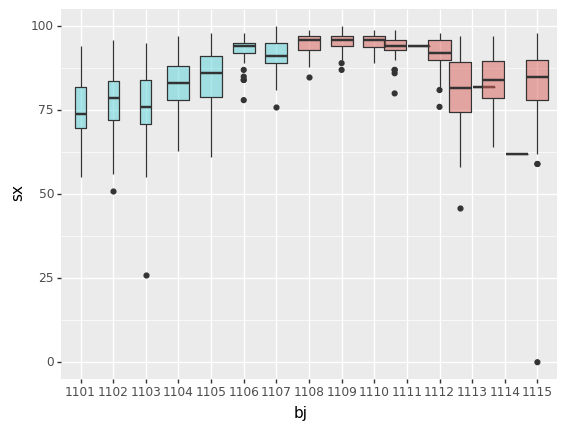

<ggplot: (-9223371920843853352)>

In [64]:
(
    ggplot(scores)
    +geom_boxplot(aes(x='bj', y='sx', fill='wlfk'), alpha=0.5)
    +theme(legend_position='none')
)

In [65]:
scores = scores[scores.ls != 0]
scores_without_bj = scores.drop(['bj'], axis=1)
scores_without_bj['stu_id'] = list(range(0, scores_without_bj.shape[0]))
scores_without_bj.head()

,xb,yw,sx,wy,zz,ls,dl,wl,hx,sw,wlfk,stu_id
0,nv,94,82,96,97,97,98,95,94,88,wen_ke,0
1,nan,87,94,89,95,94,94,90,90,89,wen_ke,1
2,nan,92,79,86,98,95,96,89,94,87,wen_ke,2
3,nv,91,84,96,93,97,94,82,90,83,wen_ke,3
4,nan,85,92,82,93,87,88,95,94,93,wen_ke,4


In [66]:
scores_melted = scores_without_bj.melt(id_vars=('stu_id', 'wlfk'), 
                            value_vars=subjects, 
                            var_name='subject',
                            value_name='score')
scores_melted.head(776)

,stu_id,wlfk,subject,score
0,0,wen_ke,yw,94
1,1,wen_ke,yw,87
2,2,wen_ke,yw,92
3,3,wen_ke,yw,91
4,4,wen_ke,yw,85
...,...,...,...,...
771,771,li_ke,yw,81
772,772,li_ke,yw,72
773,0,wen_ke,sx,82
774,1,wen_ke,sx,94


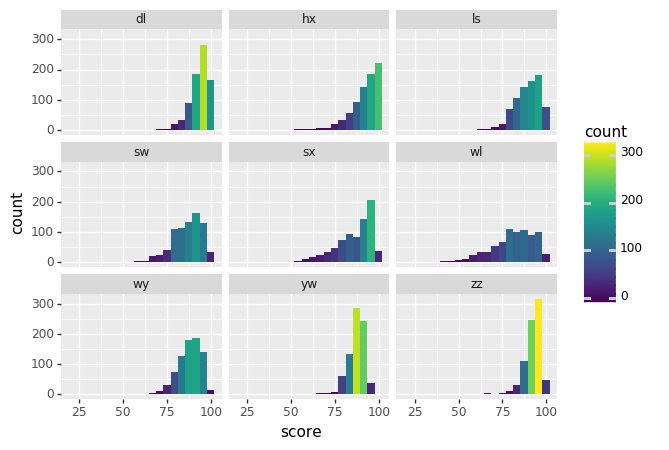

<ggplot: (-9223371920843561872)>

In [67]:
(
    ggplot(scores_melted)
    +aes(x='score')
    +geom_histogram(aes(fill='stat(count)'), bins=20)
    +facet_wrap('subject')
)

In [68]:
scores_melted = scores_melted[scores_melted.score!=0]

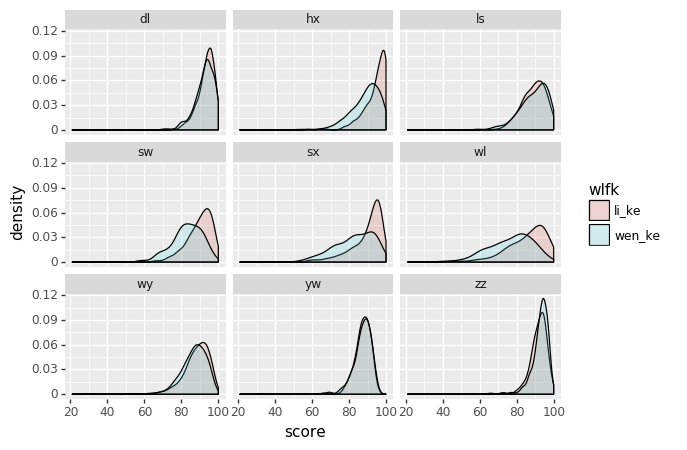

<ggplot: (-9223371920843084452)>

In [69]:
(
    ggplot(scores_melted)
    +aes(x='score', fill='wlfk')
    +geom_density(alpha=0.2)
    +facet_wrap('subject')
)

## 变量关系

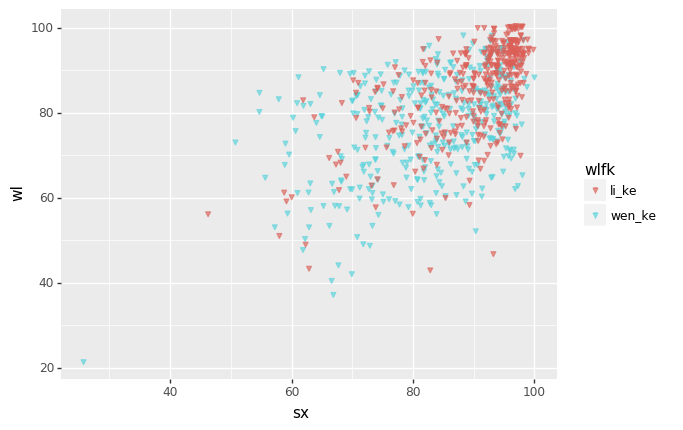

<ggplot: (-9223371920842458676)>

In [70]:
(
    ggplot(scores)
    +geom_point(aes(x='sx', y='wl', colour='wlfk'), shape='v', position='jitter', alpha=0.6)
)

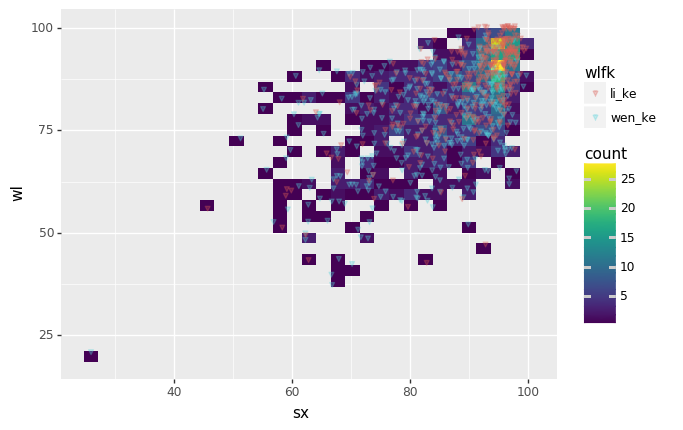

<ggplot: (-9223371920842550520)>

In [71]:
(
    ggplot(scores)
    +geom_bin2d(aes(x='sx', y='wl',bins=30))
    +geom_point(aes(x='sx', y='wl',colour='wlfk'), shape='v', position='jitter', alpha=0.3)
)

In [72]:
subject_corr = scores.corr()

In [73]:
col_names = subject_corr.columns
subject_corr['kemu1'] = subject_corr.index

In [74]:
subject_corr_melt = subject_corr.melt(id_vars='kemu1', 
                                        value_vars=col_names, 
                                       var_name='kemu2',
                                       value_name='corr')

In [75]:
subject_corr_melt['show_text'] = subject_corr_melt['corr'].round(decimals=2)

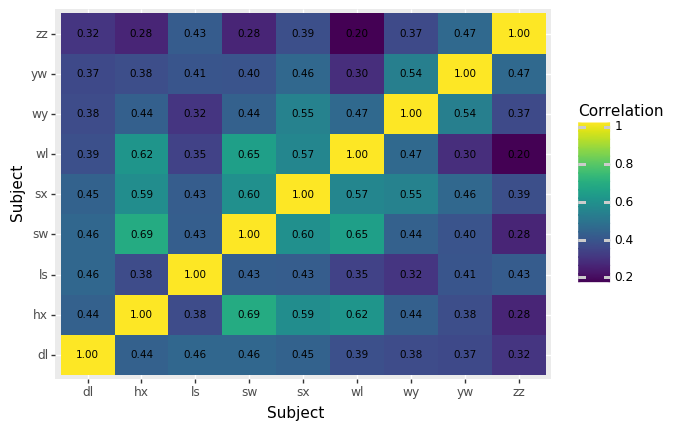

<ggplot: (-9223371920842505168)>

In [76]:
(
    ggplot(subject_corr_melt)
    +aes(x='kemu1', y='kemu2')
    +geom_tile(aes(fill='corr'))
    +geom_text(aes(label='corr'), size=7.5, format_string='{:.2f}')
    +labs(x='Subject', y='Subject', fill='Correlation')
)

In [77]:
sx_wl = scores[['sx', 'wl', 'wlfk']]

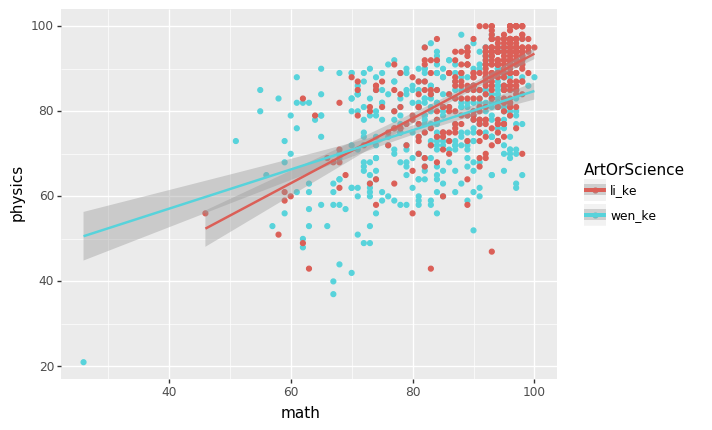

<ggplot: (-9223371920842194380)>

In [78]:
(
    ggplot(sx_wl)
    +aes(x='sx', y='wl', colour='factor(wlfk)')
    +geom_point()
    +stat_smooth(method='lm')
    +labs(x="math", y='physics', colour='ArtOrScience')
)

## 数值变量 vs 数值变量

## 类别变量 vs 数值变量

In [79]:
value_var = 'sx'
grp_var = 'bj'
value_agg = scores.loc[:, [value_var, grp_var]].groupby(grp_var)
vals = [scores[value_var].values.tolist() for x, scores in value_agg]

## 数据降维及其可视化

In [80]:
cols = subjects.copy()
cols.append('wlfk')

(-1, 9)

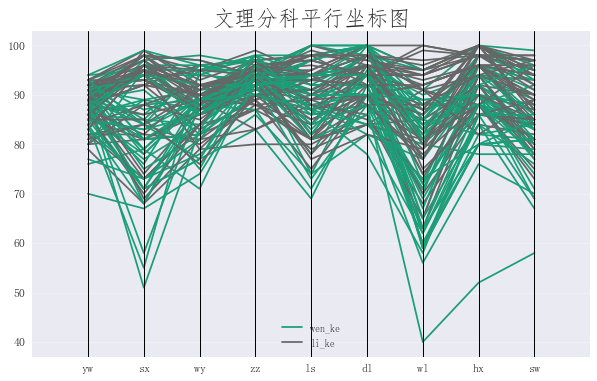

In [81]:
import random
from pandas.plotting import parallel_coordinates
n = 100
random.seed(2012)
selected_idx = random.choices(scores.index, k = n)
scores_sub = scores.loc[selected_idx, cols]

plt.figure(figsize=favorable_figsize)
parallel_coordinates(scores_sub,
                     'wlfk', 
                     colormap = 'Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.title('文理分科平行坐标图', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower center")
plt.xlim(-1, 9)

In [82]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X.drop('xb', axis=1))
X_projected = iso.transform(X.drop('xb', axis = 1))
X_projected_df = pd.DataFrame(X_projected)
X_projected_df['wlfk'] = y
X_projected_df.columns = ['p1', 'p2', 'wlfk']

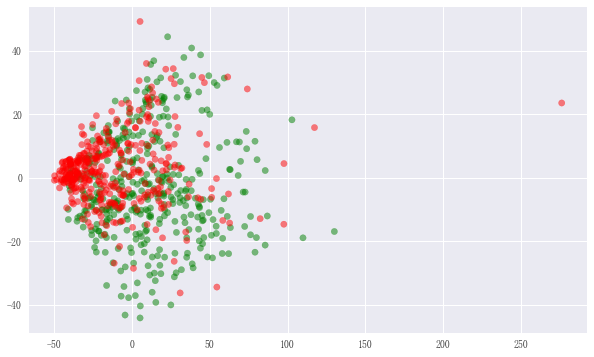

In [83]:
plt.figure(figsize=favorable_figsize)
colors = np.array(['red', 'green'])
plt.scatter(X_projected[:, 0],
            X_projected[:, 1],
            color=colors[(y_numeric + 1) // 2],
            edgecolors=colors[(y_numeric + 1) // 2],
            alpha=0.5,
            s=40)

## 数据再整理

在探索数据的过程中，发现scores存在脏数据，需要重新返回去更改我们的数据并重新存盘：

In [84]:
X = scores.drop(['bj', 'wlfk'], axis = 1)
y = scores.wlfk
subjects = ['yw', 'sx', 'wy', 'zz', 'ls', 'dl', 'wl', 'hx', 'sw']
from sklearn.preprocessing import LabelEncoder
class_encoding = LabelEncoder()
y_numeric = class_encoding.fit_transform(y)
def to_be_numeric(X, nonnumeric_cols):
    for nnc in nonnumeric_cols:
        dummies = pd.get_dummies(X.loc[:, nnc], prefix = nnc)
        X = pd.concat([X, dummies], axis = 1)
    X = X.drop(nonnumeric_cols, axis = 1)
    return X
X_numeric = to_be_numeric(X, ['xb'])

In [85]:
import pickle
objects_to_be_saved = {'X_numeric': X_numeric,
                       'y_numeric':y_numeric}
with open('pickle/ch5_data.pkl', 'wb') as f:
    pickle.dump(objects_to_be_saved, f)